In [ ]:
pip install Pillow

In [2]:
## Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pathlib import Path
from PIL import Image
import csv

## Housekeeping
disk_dir = Path("data/disk/")
disk_dir.mkdir(parents=True, exist_ok=True)
pd.set_option('display.max_columns', None, 'display.max_rows', None)

In [6]:
(feb.shape[0] + jan.shape[0] + mar.shape[0]) / 3

631.6666666666666

In [3]:
## Reading the data
jan = pd.read_csv('jan2023_output.csv')
feb = pd.read_csv('feb2023_output.csv')
mar = pd.read_csv('mar2023_output.csv')

## Concatenating all data
data = pd.concat([jan, feb, mar], axis = 0).drop(columns = ['Hour', '# Lane Points', '% Observed'])
data.reset_index(drop = True, inplace = True)

## Cutting some rows to make n_rows % 248 = 0
data = data.iloc[0:1736,]

## Scaling traffic values of data-frame to be between 0-255
flat_data = data.to_numpy().flatten()
flat_data = 255 * (flat_data - np.min(flat_data)) / (np.max(flat_data) - np.min(flat_data))
scaled_data = pd.DataFrame(flat_data.reshape((data.shape[0], data.shape[1])), columns = data.columns)

## Setting number of images to create
n_images = int(scaled_data.shape[0] / 248)

## Initializing list to store images
images = list()
labels = list()

## Creating n_images using the data
for i in range(n_images):
    img = np.array(scaled_data.iloc[(i * 248):(i*248)+248,])
    images.append(img)
    labels.append(0)
    
print("Loaded traffic data:")
print(f" - np.shape(images)     {np.shape(images)}")
print(f" - np.shape(labels)     {np.shape(labels)}")

Loaded traffic data:
 - np.shape(images)     (7, 248, 248)
 - np.shape(labels)     (7,)


In [154]:
scaled_data.head()

,1119850-ML,1108509-ML,1126614-ML,1108512-ML,1119659-ML,1122507-ML,1119865-ML,1125314-ML,1119871-ML,1122512-ML,1119879-ML,1108651-ML,1119890-ML,1108663-ML,1119903-ML,1108682-ML,1119921-ML,1108687-ML,1108659-ML,1119928-ML,1119934-ML,1119941-ML,1119947-ML,1115289-ML,1115304-ML,1115306-ML,1115314-ML,1115323-ML,1119960-ML,1119972-ML,1119984-ML,1119990-ML,1121692-ML,1121707-ML,1121715-ML,1121724-ML,1121731-ML,1121737-ML,1204198-ML,1204211-ML,1204230-ML,1204244-ML,1204255-ML,1210908-ML,1204268-ML,1204279-ML,1213215-ML,1221232-ML,1204301-ML,1204316-ML,1204328-ML,1204340-ML,1204372-ML,1204384-ML,1204395-ML,1204409-ML,1210926-ML,1220030-ML,1204422-ML,1210974-ML,1210991-ML,1204436-ML,1204447-ML,1204453-ML,1211107-ML,1222006-ML,1221985-ML,1204472-ML,1222018-ML,1204486-ML,1204501-ML,1222023-ML,1213570-ML,1204515-ML,1221811-ML,1204532-ML,1221803-ML,1213700-ML,1221835-ML,1204546-ML,1204559-ML,1221843-ML,1204571-ML,1204586-ML,1213527-ML,1204615-ML,1204632-ML,1204638-ML,1204672-ML,1204682-ML,1204697-ML,1204699-ML,1204703-ML,1204731-ML,1204750-ML,1204766-ML,1204787-ML,1204808-ML,1204825-ML,1220011-ML,1204861-ML,1204878-ML,1204924-ML,1204937-ML,1204950-ML,1204982-ML,1205012-ML,1205045-ML,1205071-ML,1205088-ML,1205135-ML,1205152-ML,1205157-ML,1205165-ML,1205168-ML,1205175-ML,1205193-ML,1205204-ML,1205215-ML,1205225-ML,1205262-ML,1205269-ML,1205290-ML,1205303-ML,1205320-ML,1205330-ML,1205375-ML,1205341-ML,1205380-ML,1212001-ML,1205409-ML,1212115-ML,1212216-ML,1205432-ML,1205452-ML,1205473-ML,1205493-ML,1212649-ML,1205517-ML,1205528-ML,1212588-ML,1205553-ML,1205562-ML,1205567-ML,1205590-ML,1214005-ML,1205607-ML,1216505-ML,1205623-ML,1205636-ML,1205658-ML,1216538-ML,1205680-ML,762347-ML,716896-ML,716899-ML,716900-ML,762353-ML,775012-ML,716904-ML,718358-ML,769625-ML,718081-ML,718360-ML,759518-ML,759513-ML,715915-ML,715918-ML,764232-ML,763985-ML,759531-ML,759542-ML,759552-ML,715930-ML,716921-ML,715933-ML,716923-ML,763975-ML,716925-ML,715938-ML,716929-ML,764435-ML,715944-ML,718086-ML,716933-ML,759566-ML,759576-ML,716937-ML,763700-ML,716942-ML,763237-ML,716951-ML,718371-ML,716953-ML,763674-ML,763669-ML,716956-ML,759591-ML,775734-ML,759602-ML,761599-ML,761604-ML,718384-ML,716963-ML,716968-ML,716971-ML,716973-ML,716974-ML,716978-ML,716981-ML,716985-ML,716988-ML,716990-ML,716994-ML,761644-ML,716997-ML,717000-ML,775462-ML,764156-ML,718389-ML,718092-ML,768682-ML,768664-ML,768655-ML,759617-ML,718394-ML,759834-ML,759626-ML,759636-ML,774092-ML,718404-ML,775535-ML,763641-ML,775520-ML,716007-ML,759648-ML,768138-ML,769091-ML,759654-ML,759666-ML,716017-ML,769029-ML,769042-ML,769054-ML,759672-ML,759677-ML,716023-ML,759685-ML
0,8.766767,8.766767,7.637713,8.600729,11.888267,8.766767,8.766767,5.711681,8.766767,8.766767,8.766767,8.766767,8.766767,8.766767,8.467899,8.766767,8.733559,4.316968,4.947910,9.298086,8.766767,9.563745,8.766767,10.194687,6.010548,3.254330,3.055085,1.992447,6.010548,6.840734,6.840734,6.840734,4.947910,6.110171,1.992447,1.926032,6.276208,2.324521,6.176585,3.320745,3.553197,7.172809,4.914702,4.416591,5.279984,6.076963,5.944133,6.010548,6.043756,5.844511,4.649043,8.667144,6.043756,5.977341,5.113947,5.180362,6.741112,4.217346,5.844511,5.180362,5.113947,6.043756,4.748665,4.815080,6.608282,9.729783,9.729783,9.696575,7.372054,9.696575,9.696575,9.729783,9.098841,7.471676,6.541867,10.626384,8.069410,12.751660,6.807527,12.784868,8.268655,6.741112,8.766767,9.696575,12.784868,12.784868,12.784868,9.696575,9.696575,5.612059,4.981117,6.973564,5.811304,4.649043,3.852064,6.973564,7.239224,8.002995,13.282980,11.058080,7.836958,7.338846,3.221123,8.567522,6.575075,16.969006,15.541086,10.493554,12.253549,9.663368,10.360724,10.958458,9.231671,11.855059,9.630160,9.530538,9.696575,12.784868,11.423362,13.548639,9.630160,13.913921,13.382602,7.206016,10.892043,7.604506,7.405261,8.600729,7.936580,8.235447,7.073187,9.929027,8.600729,8.833181,11.556192,12.685245,12.021096,13.515432,18.762209,12.585623,12.718453,12.253549,9.630160,12.552416,18.828624,6.409038,7.637713,8.434692

In [157]:
## Storing all images to disk
def store_many_disk(images, labels):

    ## Saving images one by one
    for i, image in enumerate(images):
        storing = Image.fromarray(image)
        storing = storing.convert('L')
        storing.save(disk_dir / f"{i}.png")
            
## Experimenting
store_many_disk(images, labels)

In [158]:
## Reading all images from disk
def read_many_disk(n_images):
    images = []
    for image_id in range(n_images):
        images.append(np.array(Image.open(disk_dir / f"{image_id}.png")))
    return images

n_images = 7
imgs = read_many_disk(n_images)

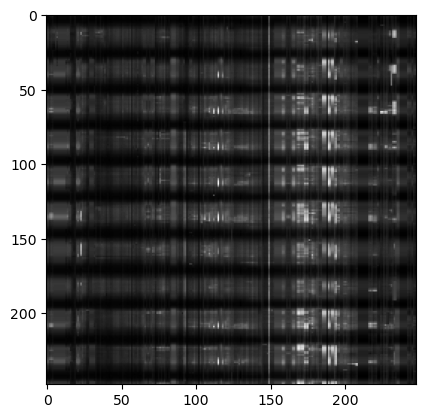

In [160]:
plt.imshow(imgs[0], cmap = 'gray')

### Experimenting with missing values:

In [183]:
## Reading the data
jan = pd.read_csv('jan2023_output.csv')
feb = pd.read_csv('feb2023_output.csv')
mar = pd.read_csv('mar2023_output.csv')

## Concatenating all data
data = pd.concat([jan, feb, mar], axis = 0).drop(columns = ['Hour', '# Lane Points', '% Observed'])
data.reset_index(drop = True, inplace = True)

## Cutting some rows to make n_rows % 248 = 0
data = data.iloc[0:1736,]

## Scaling traffic values of data-frame to be between 0-255
flat_data = data.to_numpy().flatten()
flat_data = 255 * (flat_data - np.min(flat_data)) / (np.max(flat_data) - np.min(flat_data))
scaled_data = pd.DataFrame(flat_data.reshape((data.shape[0], data.shape[1])), columns = data.columns)

scaled_data.iloc[0:100, 0:30] = np.nan

## Setting number of images to create
n_images = int(scaled_data.shape[0] / 248)

## Initializing list to store images
images = list()
labels = list()

## Creating n_images using the data
for i in range(n_images):
    img = np.array(scaled_data.iloc[(i * 248):(i*248)+248,])
    images.append(img)
    labels.append(0)
    
print("Loaded traffic data:")
print(f" - np.shape(images)     {np.shape(images)}")
print(f" - np.shape(labels)     {np.shape(labels)}")

Loaded traffic data:
 - np.shape(images)     (7, 248, 248)
 - np.shape(labels)     (7,)


In [184]:
scaled_data.head()

,1119850-ML,1108509-ML,1126614-ML,1108512-ML,1119659-ML,1122507-ML,1119865-ML,1125314-ML,1119871-ML,1122512-ML,1119879-ML,1108651-ML,1119890-ML,1108663-ML,1119903-ML,1108682-ML,1119921-ML,1108687-ML,1108659-ML,1119928-ML,1119934-ML,1119941-ML,1119947-ML,1115289-ML,1115304-ML,1115306-ML,1115314-ML,1115323-ML,1119960-ML,1119972-ML,1119984-ML,1119990-ML,1121692-ML,1121707-ML,1121715-ML,1121724-ML,1121731-ML,1121737-ML,1204198-ML,1204211-ML,1204230-ML,1204244-ML,1204255-ML,1210908-ML,1204268-ML,1204279-ML,1213215-ML,1221232-ML,1204301-ML,1204316-ML,1204328-ML,1204340-ML,1204372-ML,1204384-ML,1204395-ML,1204409-ML,1210926-ML,1220030-ML,1204422-ML,1210974-ML,1210991-ML,1204436-ML,1204447-ML,1204453-ML,1211107-ML,1222006-ML,1221985-ML,1204472-ML,1222018-ML,1204486-ML,1204501-ML,1222023-ML,1213570-ML,1204515-ML,1221811-ML,1204532-ML,1221803-ML,1213700-ML,1221835-ML,1204546-ML,1204559-ML,1221843-ML,1204571-ML,1204586-ML,1213527-ML,1204615-ML,1204632-ML,1204638-ML,1204672-ML,1204682-ML,1204697-ML,1204699-ML,1204703-ML,1204731-ML,1204750-ML,1204766-ML,1204787-ML,1204808-ML,1204825-ML,1220011-ML,1204861-ML,1204878-ML,1204924-ML,1204937-ML,1204950-ML,1204982-ML,1205012-ML,1205045-ML,1205071-ML,1205088-ML,1205135-ML,1205152-ML,1205157-ML,1205165-ML,1205168-ML,1205175-ML,1205193-ML,1205204-ML,1205215-ML,1205225-ML,1205262-ML,1205269-ML,1205290-ML,1205303-ML,1205320-ML,1205330-ML,1205375-ML,1205341-ML,1205380-ML,1212001-ML,1205409-ML,1212115-ML,1212216-ML,1205432-ML,1205452-ML,1205473-ML,1205493-ML,1212649-ML,1205517-ML,1205528-ML,1212588-ML,1205553-ML,1205562-ML,1205567-ML,1205590-ML,1214005-ML,1205607-ML,1216505-ML,1205623-ML,1205636-ML,1205658-ML,1216538-ML,1205680-ML,762347-ML,716896-ML,716899-ML,716900-ML,762353-ML,775012-ML,716904-ML,718358-ML,769625-ML,718081-ML,718360-ML,759518-ML,759513-ML,715915-ML,715918-ML,764232-ML,763985-ML,759531-ML,759542-ML,759552-ML,715930-ML,716921-ML,715933-ML,716923-ML,763975-ML,716925-ML,715938-ML,716929-ML,764435-ML,715944-ML,718086-ML,716933-ML,759566-ML,759576-ML,716937-ML,763700-ML,716942-ML,763237-ML,716951-ML,718371-ML,716953-ML,763674-ML,763669-ML,716956-ML,759591-ML,775734-ML,759602-ML,761599-ML,761604-ML,718384-ML,716963-ML,716968-ML,716971-ML,716973-ML,716974-ML,716978-ML,716981-ML,716985-ML,716988-ML,716990-ML,716994-ML,761644-ML,716997-ML,717000-ML,775462-ML,764156-ML,718389-ML,718092-ML,768682-ML,768664-ML,768655-ML,759617-ML,718394-ML,759834-ML,759626-ML,759636-ML,774092-ML,718404-ML,775535-ML,763641-ML,775520-ML,716007-ML,759648-ML,768138-ML,769091-ML,759654-ML,759666-ML,716017-ML,769029-ML,769042-ML,769054-ML,759672-ML,759677-ML,716023-ML,759685-ML
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.840734,6.840734,4.947910,6.110171,1.992447,1.926032,6.276208,2.324521,6.176585,3.320745,3.553197,7.172809,4.914702,4.416591,5.279984,6.076963,5.944133,6.010548,6.043756,5.844511,4.649043,8.667144,6.043756,5.977341,5.113947,5.180362,6.741112,4.217346,5.844511,5.180362,5.113947,6.043756,4.748665,4.815080,6.608282,9.729783,9.729783,9.696575,7.372054,9.696575,9.696575,9.729783,9.098841,7.471676,6.541867,10.626384,8.069410,12.751660,6.807527,12.784868,8.268655,6.741112,8.766767,9.696575,12.784868,12.784868,12.784868,9.696575,9.696575,5.612059,4.981117,6.973564,5.811304,4.649043,3.852064,6.973564,7.239224,8.002995,13.282980,11.058080,7.836958,7.338846,3.221123,8.567522,6.575075,16.969006,15.541086,10.493554,12.253549,9.663368,10.360724,10.958458,9.231671,11.855059,9.630160,9.530538,9.696575,12.784868,11.423362,13.548639,9.630160,13.913921,13.382602,7.206016,10.892043,7.604506,7.405261,8.600729,7.936580,8.235447,7.073187,9.929027,8.600729,8.833181,11.556192,12.685245,12.021096,13.515432,18.762209,12.585623,12.718453,12.253549,9.630160,12.552416,18.828624,6.409038,7.637713,8.434692,8.633937,56.253418,11.024873,9.729783,9.929027,12.917698,12.917698,12.917698,12.917698,12.917698,16.537310,16.537310,12.917698,15.939575,11.290533,15.5

In [185]:
## Storing all images to disk
def store_many_disk(images, labels):

    ## Saving images one by one
    for i, image in enumerate(images):
        storing = Image.fromarray(image)
        storing = storing.convert('L')
        storing.save(disk_dir / f"{i}.png")
            
## Experimenting
store_many_disk(images, labels)

In [186]:
## Reading all images from disk
def read_many_disk(n_images):
    images = []
    for image_id in range(n_images):
        images.append(np.array(Image.open(disk_dir / f"{image_id}.png")))
    return images

n_images = 7
imgs = read_many_disk(n_images)

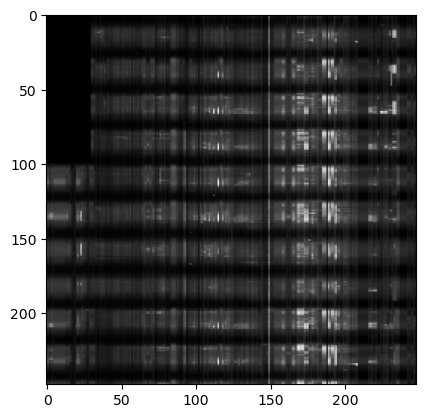

In [187]:
plt.imshow(imgs[0], cmap = 'gray')

In [ ]:
pip install tensorflow

In [12]:
import tensorflow as tf

In [17]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty